# Reto | Mercadotecnia telefónica con aprendizaje supervisado 📞

# Introducción
Los programas de telemarketing se han venido usando por las empresas durante años como una forma de comunicarse con clientes potenciales de manera directa por vía telefónica. En los últimos años el uso de las técnicas de inteligencia artificial ha permitido potencializar el impacto de estos programas de mercadotecnia.

Un banco ha lanzado un nuevo plan de inversión a largo plazo a través de un programa de telemarketing y desea saber que tan exitoso se puede considerar este programa utilizando técnicas de aprendizaje supervisado. El programa es lanzado a clientes del banco, por lo que este estudio ayudará a optimizar los esfuerzos al conocer las características de los clientes más propensos a adquirir dicho plan de inversión.

 En la presente actividad tu objetivo es predecir si el entrevistado adquirirá el plan de inversión bancario de acuerdo con varias características que se conocen de dicho cliente.

 # Objetivo
 Diseñar e implementar un modelo de aprendizaje supervisado que pueda predecir si una persona adquiere o no un plan de inversión bancaria a través de una entrevista telefónica.

 # Instrucciones
 A continuación, se describen los pasos a realizar en la presente actividad, en lo que llamaremos el Plan del Reto:

1.	Deberás utilizar el archivo llamado bank_marketing.csv. con los datos de problema.
2.	Utilizar el archivo bank-names.txt para obtener información de cada una de las variables.
3.	Crear un proyecto tipo Jupyter Notebook en Google-Colab llamado Solucion_Reto_SC_63_<nombre_y_apellido_del_estudiante>.ipynb.
4.	Incluye las librerías que consideres adecuadas y carga los datos del archivo en una variable llamada “data”.
5.	Obtener la información de dicha base de datos que incluya el número de registros, el total de variables, el tipo de cada variable, la cantidad de datos perdidos de cada variable en caso de que existan.
6.	Transforma las variables categóricas de manera que puedan ser tratadas numéricamente. Justifica si utilizas LabelEncoder o OneHotEcoder.
7.	Transforma las variables numéricas en los casos que se tenga algún tipo de sesgo.
8.	Considera la variable “y” como la variable de salida y el resto de las variables como las variables de entrada.
9.	Particiona los datos en los conjuntos de entrenamiento, validación y prueba en 60%, 20% y 20%, respectivamente.
10.	Aplica el modelo Regresión Logística en el conjunto de entrenamiento. Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión. Ajusta los parámetros del modelo hasta obtener tu mejor resultado.
11.	Aplica el modelo Red Neuronal en el conjunto de entrenamiento. Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión. Ajusta los parámetros del modelo hasta obtener tu mejor modelo, entre ellos el número de neuronas y capas ocultas.
12.	Selecciona el mejor modelo encontrado en los incisos anteriores y utiliza el conjunto de prueba para obtener el desempeño final del modelo y su matriz de confusión.
13.	Incluye tus conclusiones del problema, en particular, ¿qué puedes decir acerca del uso de técnicas de inteligencia artificial en problemas de mercadotecnia?
14.	Descarga tu script (archivo con extensión .ipynb) y guárdalo siguiendo la nomenclatura que se te indica en Formato de entrega de actividad.  
15.	Sube el archivo a GitHub.  
16.	Copia y pega en un archivo de edición de texto la liga de tu archivo.

# Carga de datos

Incluye las librerías que consideres adecuadas y carga los datos del archivo en una variable llamada “data”.

In [65]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/cindylozano/DataScienceTLG/AprendizajeSupervisado/bank_marketing.csv')

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,self-employed,married,tertiary,no,2666,no,no,cellular,10,nov,318,2,97,6,success,yes
1,29,unemployed,single,unknown,no,1584,no,no,cellular,6,sep,245,1,-1,0,unknown,yes
2,41,blue-collar,married,secondary,no,2152,yes,no,cellular,17,nov,369,1,-1,0,unknown,no
3,50,blue-collar,married,secondary,no,84,yes,no,cellular,17,jul,18,8,-1,0,unknown,no
4,40,admin.,married,secondary,no,0,no,no,cellular,28,jul,496,2,182,11,success,yes


Obtener la información de dicha base de datos que incluya el número de registros, el total de variables, el tipo de cada variable, la cantidad de datos perdidos de cada variable en caso de que existan.

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


In [67]:
data_original = data.copy()

Número de registros: 9000 (ninguna columna contiene datos perdidos).

Número de variables: 16 + 1 atributo de salida.

Información sobre las variables: 7 variables numéricas y 10 categóricas.
____________________________________
## **Variables de entrada**

**Datos del cliente bancario:**

1. age: edad (numérico)
2. job: tipo de trabajo (categórico: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student",
"blue-collar", "self-employed", "retired", "technician", "services")
3. marital: estado civil (categórico: "married", "divorced", "single"; nota: "divorced" incluye divorciado o viudo)
4. education: educación (categórico: "unknown", "secondary", "primary", "tertiary")
5. default: ¿tiene crédito en incumplimiento? (binario: "yes", "no")
6. balance: balance promedio anual, en euros (numérico)
7. housing: ¿tiene préstamo de vivienda? (binario: "yes", "no")
8. loan: ¿tiene préstamo personal? (binario: "yes", "no")

**Relacionado con el último contacto de la campaña actual:**

9. contact: tipo de comunicación de contacto (categórico: "unknown", "telephone", "cellular")
10. day: último día de contacto del mes (numérico)
11. month: último mes de contacto del año (categórico: "jan", "feb", "mar", ..., "nov", "dec")
12. duration: duración del último contacto, en segundos (numérico)

**Otros atributos:**
13. campaign: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto)
14. pdays: número de días que han pasado desde que el cliente fue contactado por última vez en una campaña anterior (numérico, -1 significa que el cliente no fue contactado previamente)
15. previous: número de contactos realizados antes de esta campaña y para este cliente (numérico)
16. poutcome: resultado de la campaña de marketing anterior (categórico: "unknown", "other", "failure", "success")

## **Variable de salida (objetivo deseado):**
17. y - ¿ha suscrito el cliente un depósito a plazo? (binario: "yes", "no")

# Transformación o preprocesamiento de los datos

* Transforma las variables categóricas de manera que puedan ser tratadas numéricamente. Justifica si utilizas LabelEncoder o OneHotEcoder.
* Transforma las variables numéricas en los casos que se tenga algún tipo de sesgo.


In [68]:
# Valores únicos por columna categórica
col_cat = data.select_dtypes(include=['object']).columns
valores_unicos = data[col_cat].nunique()
valores_unicos

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
y             2
dtype: int64

In [69]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Definir las columnas a transformar
le_cols = ['default', 'housing', 'loan', 'y']
ohe_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

# Aplicar LabelEncoder a las columnas seleccionadas
label_encoder = LabelEncoder()
for col in le_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Aplicar OneHotEncoder a las columnas seleccionadas
onehot_encoder = OneHotEncoder(sparse=False,  drop='first')
encoded_data = onehot_encoder.fit_transform(data[ohe_cols])

# Obtener los nombres de las nuevas columnas
columns_names = onehot_encoder.get_feature_names_out(ohe_cols)

# Crear un nuevo DataFrame con las nuevas columnas
one_hot_encoded_df = pd.DataFrame(
    encoded_data,
    columns = columns_names
)

# Concatenar el DataFrame original (sin las columnas codificadas) con el nuevo DataFrame de OneHotEncoder
data = pd.concat([data.drop(columns=ohe_cols), one_hot_encoded_df], axis=1)

# Mostrar el DataFrame transformado
data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,31,0,2666,0,0,10,318,2,97,6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,29,0,1584,0,0,6,245,1,-1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,41,0,2152,1,0,17,369,1,-1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,50,0,84,1,0,17,18,8,-1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,40,0,0,0,0,28,496,2,182,11,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**Justificación**

* job: OneHotEncoder. No hay orden implícito, y 12 categorías es manejable.
* marital: OneHotEncoder. No hay orden, y con 3 categorías el aumento en dimensionalidad es mínimo.
* education: OneHotEncoder. No hay un orden claro (está el valor unknown) y la diferencia puede no ser lineal entre categorías.
* default: LabelEncoder. Solo 2 categorías, adecuado para codificación binaria.
* housing: LabelEncoder. Solo 2 categorías, adecuado para codificación binaria.
* loan: LabelEncoder. Solo 2 categorías, adecuado para codificación binaria.
* contact: OneHotEncoder. No hay orden implícito, y 3 categorías es manejable.
* month: OneHotEncoder. Aunque hay orden temporal, usualmente es mejor evitar la relación implícita de distancia.
* poutcome: OneHotEncoder. No hay orden implícito, y 4 categorías es manejable.
* y: LabelEncoder. Variable de salida binaria, LabelEncoder es adecuado.

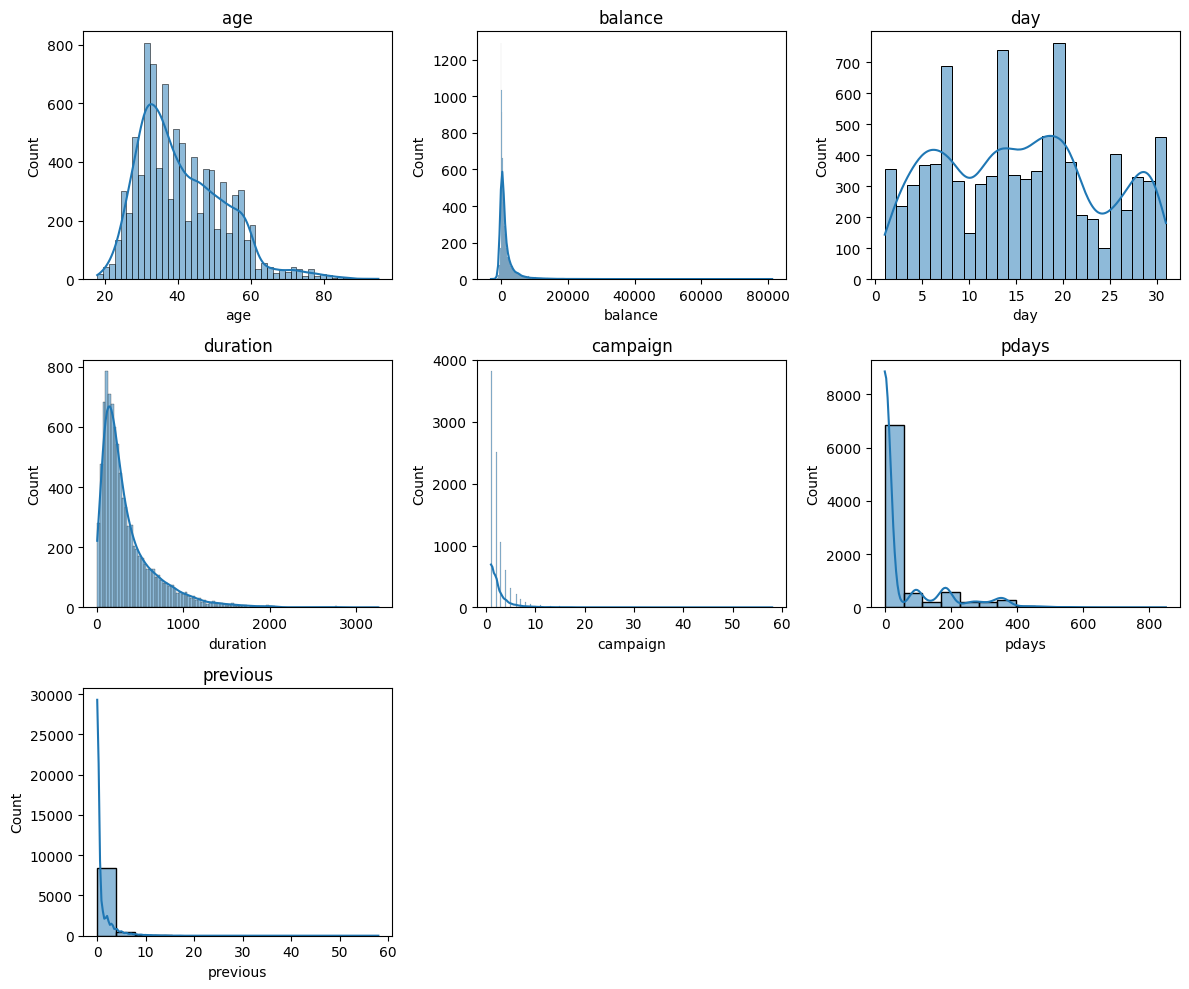

In [70]:
# Análisis de variables numéricas
import matplotlib.pyplot as plt
import seaborn as sns

col_num = data_original.select_dtypes(include=['int64']).columns

# Generación de histogramas para observar su distribución
plt.figure(figsize=(12, 10))

for i, col in enumerate(col_num):
    plt.subplot(3, 3, i + 1)  # 3 filas, 3 columnas, índice i+1
    sns.histplot(data_original[col], kde=True)  # kde=True para mostrar la estimación de densidad kernel
    plt.title(col)  # Añadir título a cada subplot
    plt.xlabel(col)  # Añadir etiqueta al eje x

plt.tight_layout()
plt.show()

Se detectaron algunas variables con sesgo, por lo que se procede a realizar una transformación logarítmica.

In [71]:
import numpy as np

# Definir las columnas a transformar con log(x + 1)
col_sesgo = ['balance', 'duration', 'campaign', 'pdays', 'previous']

# Función para la transformación logarítmica
def transform_log(x):
    return np.log(x + 1)

# Aplicar la transformación logarítmica a las columnas con sesgo
for col in col_sesgo:
    data[col] = transform_log(data[col])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


**Validación de la transformación**

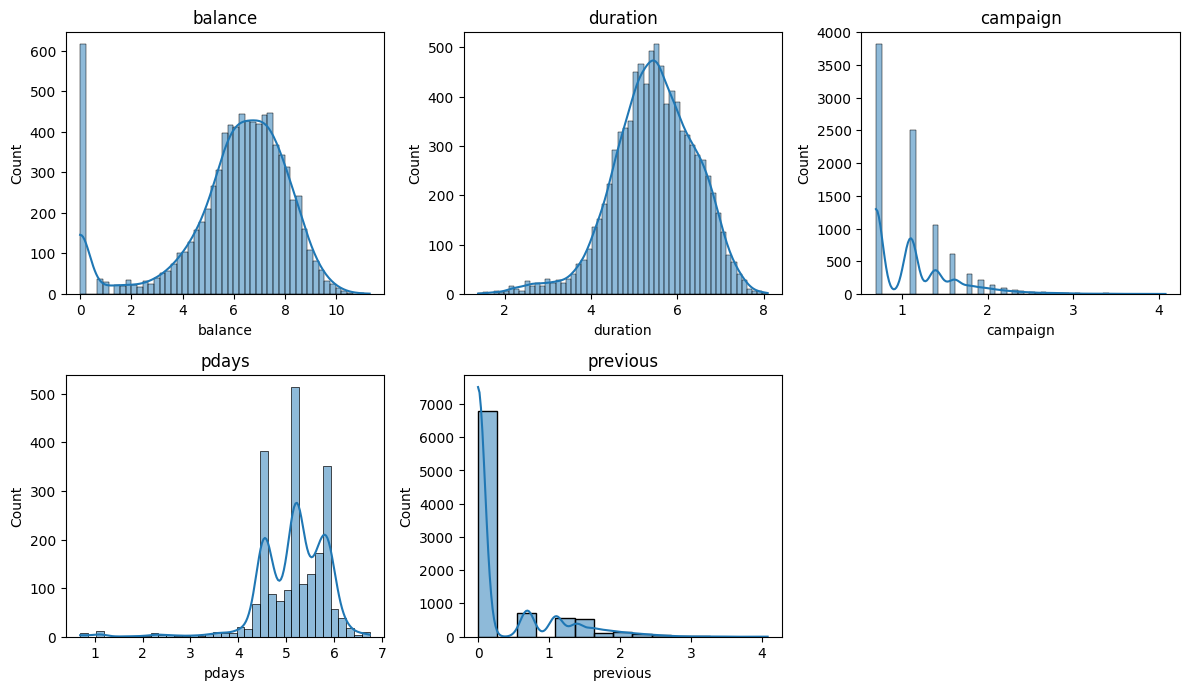

In [72]:
col_num = data[['balance', 'duration', 'campaign', 'pdays', 'previous']]

# Generación de histogramas para observar su distribución
plt.figure(figsize=(12, 10))

for i, col in enumerate(col_num):
    plt.subplot(3, 3, i + 1)  # 3 filas, 3 columnas, índice i+1
    sns.histplot(data[col], kde=True)  # kde=True para mostrar la estimación de densidad kernel
    plt.title(col)  # Añadir título a cada subplot
    plt.xlabel(col)  # Añadir etiqueta al eje x

plt.tight_layout()
plt.show()

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9000 non-null   int64  
 1   default              9000 non-null   int64  
 2   balance              8364 non-null   float64
 3   housing              9000 non-null   int64  
 4   loan                 9000 non-null   int64  
 5   day                  9000 non-null   int64  
 6   duration             9000 non-null   float64
 7   campaign             9000 non-null   float64
 8   pdays                9000 non-null   float64
 9   previous             9000 non-null   float64
 10  y                    9000 non-null   int64  
 11  job_blue-collar      9000 non-null   float64
 12  job_entrepreneur     9000 non-null   float64
 13  job_housemaid        9000 non-null   float64
 14  job_management       9000 non-null   float64
 15  job_retired          9000 non-null   f

In [74]:
data.head(10)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,31,0,7.888710,0,0,10,5.765191,1.098612,4.584967,1.945910,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,29,0,7.368340,0,0,6,5.505332,0.693147,-inf,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,41,0,7.674617,1,0,17,5.913503,0.693147,-inf,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,50,0,4.442651,1,0,17,2.944439,2.197225,-inf,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,40,0,0.000000,0,0,28,6.208590,1.098612,5.209486,2.484907,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,58,0,9.027979,0,0,13,6.608001,1.609438,-inf,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,36,0,5.293305,1,0,11,6.208590,0.693147,-inf,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7,26,0,7.116394,1,0,3,5.955837,1.098612,4.574711,1.791759,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,34,0,7.749753,1,0,18,4.158883,0.693147,-inf,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,26,0,3.871201,1,0,18,4.158883,0.693147,-inf,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


**Transformación con MinMaxScaler**

In [75]:
from sklearn.preprocessing import MinMaxScaler

# Eliminar valores infinitos
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9000 non-null   int64  
 1   default              9000 non-null   int64  
 2   balance              8354 non-null   float64
 3   housing              9000 non-null   int64  
 4   loan                 9000 non-null   int64  
 5   day                  9000 non-null   int64  
 6   duration             9000 non-null   float64
 7   campaign             9000 non-null   float64
 8   pdays                2219 non-null   float64
 9   previous             9000 non-null   float64
 10  y                    9000 non-null   int64  
 11  job_blue-collar      9000 non-null   float64
 12  job_entrepreneur     9000 non-null   float64
 13  job_housemaid        9000 non-null   float64
 14  job_management       9000 non-null   float64
 15  job_retired          9000 non-null   f

In [77]:
# Llenar datos perdidos
data['balance'] = data['balance'].fillna(data['balance'].mean())
data['pdays'] = data['pdays'].fillna(data['pdays'].mean())

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9000 non-null   int64  
 1   default              9000 non-null   int64  
 2   balance              9000 non-null   float64
 3   housing              9000 non-null   int64  
 4   loan                 9000 non-null   int64  
 5   day                  9000 non-null   int64  
 6   duration             9000 non-null   float64
 7   campaign             9000 non-null   float64
 8   pdays                9000 non-null   float64
 9   previous             9000 non-null   float64
 10  y                    9000 non-null   int64  
 11  job_blue-collar      9000 non-null   float64
 12  job_entrepreneur     9000 non-null   float64
 13  job_housemaid        9000 non-null   float64
 14  job_management       9000 non-null   float64
 15  job_retired          9000 non-null   f

# Partición de los datos en los conjuntos

* Considera la variable “y” como la variable de salida y el resto de las variables como las variables de entrada.
* Particiona los datos en los conjuntos de entrenamiento, validación y prueba en 60%, 20% y 20%, respectivamente.


In [78]:
from sklearn.model_selection import train_test_split

X = data[['age', 'default', 'balance', 'housing', 'loan', 'day',
                      'duration', 'campaign', 'pdays', 'previous', 'job_blue-collar',
                      'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
                      'job_self-employed', 'job_services', 'job_student', 'job_technician',
                      'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
                      'education_secondary', 'education_tertiary', 'education_unknown',
                      'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
                      'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
                      'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
                      'poutcome_success', 'poutcome_unknown']]

Y = data[['y']]

# Partición en los conjuntos

X_train, X_val_test, Y_train, Y_val_test = train_test_split(X, Y, train_size=.60) # 60% para el entrenamiento de los datos

X_val, X_test, Y_val, Y_test = train_test_split(X_val_test, Y_val_test, train_size=.50) # 50% del resto de los datos para validación y para prueba (o sea 20% y 20%)

In [79]:
X.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,31,0,7.888710,0,0,10,5.765191,1.098612,4.584967,1.945910,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,29,0,7.368340,0,0,6,5.505332,0.693147,5.144606,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,41,0,7.674617,1,0,17,5.913503,0.693147,5.144606,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,50,0,4.442651,1,0,17,2.944439,2.197225,5.144606,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,40,0,0.000000,0,0,28,6.208590,1.098612,5.209486,2.484907,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [80]:
Y.head()

,y
0,1
1,1
2,0
3,0
4,1


In [81]:
# Variables de entrada
print("Dimensión X_train_set:\t\t", X_train.shape)
print("Dimensión X_validation_set:\t", X_val.shape)
print("Dimension X_test_set:\t\t", X_test.shape)

# Variable de salida
print("\nDimensión Y_train:\t\t", Y_train.shape)
print("Dimensión Y_validation:\t\t", Y_val.shape)
print("Dimensión Y_test:\t\t", Y_test.shape)

Dimensión X_train_set:		 (5400, 42)
Dimensión X_validation_set:	 (1800, 42)
Dimension X_test_set:		 (1800, 42)

Dimensión Y_train:		 (5400, 1)
Dimensión Y_validation:		 (1800, 1)
Dimensión Y_test:		 (1800, 1)


# Implementación de modelos

*	Aplica el modelo Regresión Logística en el conjunto de entrenamiento. Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión. Ajusta los parámetros del modelo hasta obtener tu mejor resultado.
*	Aplica el modelo Red Neuronal en el conjunto de entrenamiento. Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión. Ajusta los parámetros del modelo hasta obtener tu mejor modelo, entre ellos el número de neuronas y capas ocultas.

In [82]:
Y.value_counts()/len(Y)*100

y
0    57.922222
1    42.077778
Name: count, dtype: float64

## Modelo regresión logística

In [85]:
from sklearn.linear_model import LogisticRegression

# Crear una instancia del modelo de regresión logística
model_RL = LogisticRegression(max_iter=1000)

# Entrenar el modelo con los datos de entrenamiento
model_RL.fit(X_train, np.ravel(Y_train))

# Validar el modelo
accuracy_val_RL = model_RL.score(X_val, np.ravel(Y_val))

accuracy_val_RL

0.8305555555555556

Sin ajuste de parámetros, del primer modelo se obtiene un 83% de exactitud.

/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


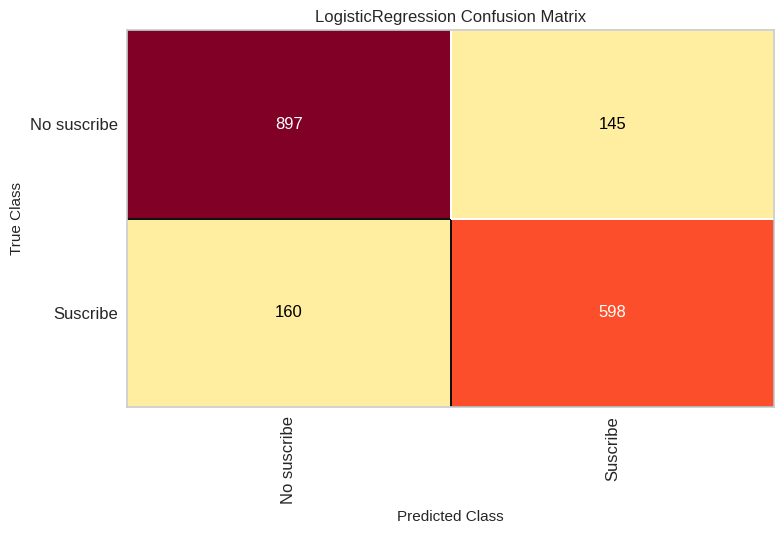

<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [88]:
# Matriz de confusión
from yellowbrick.classifier import ConfusionMatrix

visualizer = ConfusionMatrix(model_RL, classes=['No suscribe', 'Suscribe'])

visualizer.score(X_val, np.ravel(Y_val))
visualizer.show()

**Interpretación**

* 897: Predicciones correctas de "No Suscribe".
* 598: Predicciones correctas de "Suscribe".
* 145: Falsos positivos (predicciones incorrectas de "Suscribe" para casos que eran "No Suscribe").
* 160: Falsos negativos (predicciones incorrectas de "No Suscribe" para casos que eran "Suscribe").

**Ajuste de parámetros**

In [89]:
from sklearn.model_selection import GridSearchCV

# Parámetros para probar
parameters = {'C':[0.1, 0.15, 0.18, 0.2, 0.22, 0.24, 0.28, 0.3],
              'penalty':('l2','elasticnet', None),
              'solver':('newton-cg','saga','lbfgs','sag')}

RL_grid = LogisticRegression(max_iter=10000)
modelo_RL_grid = GridSearchCV(RL_grid, parameters)

modelo_RL_grid.fit(X_train, np.ravel(Y_train))

print(modelo_RL_grid)

print("Los mejores valores encontrados son %s con un score de %0.2f"
      % (modelo_RL_grid.best_params_, modelo_RL_grid.best_score_))

print(modelo_RL_grid.score(X_val, np.ravel(Y_val)))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and

GridSearchCV(estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 0.15, 0.18, 0.2, 0.22, 0.24, 0.28, 0.3],
                         'penalty': ('l2', 'elasticnet', None),
                         'solver': ('newton-cg', 'saga', 'lbfgs', 'sag')})
Los mejores valores encontrados son {'C': 0.1, 'penalty': None, 'solver': 'newton-cg'} con un score de 0.82
0.8327777777777777


Los mejores valores encontrados son {'C': 0.1, 'penalty': None, 'solver': 'newton-cg'} con un score de 0.82

Score con los datos de validación: 0.83

## Modelo red neuronal

In [91]:
from sklearn.neural_network import MLPClassifier

# Crear una instancia del modelo red neuronal
model_MLP = MLPClassifier(hidden_layer_sizes=(42,), max_iter=1000, solver='adam', random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model_MLP.fit(X_train, np.ravel(Y_train))

# Validar el modelo
accuracy_val_MLP = model_MLP.score(X_val, np.ravel(Y_val))

accuracy_val_MLP

0.8461111111111111

Sin ajuste de parámetros, del primer modelo se obtiene un 85% de exactitud.

/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


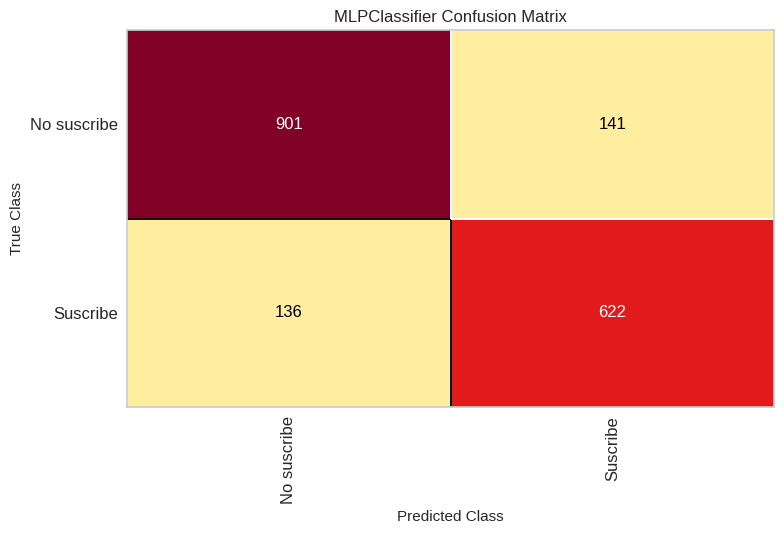

<Axes: title={'center': 'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [92]:
# Matriz de confusión
from yellowbrick.classifier import ConfusionMatrix

visualizer = ConfusionMatrix(model_MLP, classes=['No suscribe', 'Suscribe'])

visualizer.score(X_val, np.ravel(Y_val))
visualizer.show()

**Interpretación**

* 901: Predicciones correctas de "No Suscribe".
* 622: Predicciones correctas de "Suscribe".
* 141: Falsos positivos (predicciones incorrectas de "Suscribe" para casos que eran "No Suscribe").
* 136: Falsos negativos (predicciones incorrectas de "No Suscribe" para casos que eran "Suscribe").

**Ajuste de parámetros**

In [95]:
neuronas = [i for i in range(21, 70, 7)]

train_scores, val_scores = list(), list()
train_errors, val_errors = list(), list()

for i in neuronas:

  model_MLP = MLPClassifier(hidden_layer_sizes=(i,i),
                            max_iter=1000,
                            alpha=0.7,
                            random_state=42)

  model_MLP.fit(X_train, np.ravel(Y_train))

  # TRAIN set
  train_yhat = model_MLP.predict(X_train)

  train_loss = np.mean(abs(np.ravel(Y_train) - train_yhat))
  train_errors.append(train_loss)

  train_acc = 1 - train_loss
  train_scores.append(train_acc)


  # VAL set
  val_yhat = model_MLP.predict(X_val)

  val_loss = np.mean(abs(np.ravel(Y_val) - val_yhat))
  val_errors.append(val_loss)

  val_acc = 1 - val_loss
  val_scores.append(val_acc)


  # progreso del entrenamiento ...
  print('>%d, train: %.3f, val: %.3f, losstrain: %.3f, lossval: %.3f' % (i, train_acc, val_acc, train_loss, val_loss))

>21, train: 0.836, val: 0.832, losstrain: 0.164, lossval: 0.168
>28, train: 0.849, val: 0.848, losstrain: 0.151, lossval: 0.152
>35, train: 0.831, val: 0.831, losstrain: 0.169, lossval: 0.169
>42, train: 0.841, val: 0.837, losstrain: 0.159, lossval: 0.163
>49, train: 0.853, val: 0.851, losstrain: 0.147, lossval: 0.149
>56, train: 0.840, val: 0.838, losstrain: 0.160, lossval: 0.162
>63, train: 0.846, val: 0.844, losstrain: 0.154, lossval: 0.156


Los mejores parámetros encontrados son 49 neuronas con un score de 0.85

Score con los datos de validación: 0.85

# Conjunto de prueba y conclusiones

El mejor modelo encontrado en los ejercicios anteriores fue el modelo de red neuronal con 49 neuronas en 2 capas.

In [98]:
from sklearn.neural_network import MLPClassifier

model_final = MLPClassifier(hidden_layer_sizes=(49,49),
                            max_iter=1000,
                            alpha=0.7,
                            random_state=42)

model_final.fit(X_train, np.ravel(Y_train))

accuracy_val_model_final = model_final.score(X_val, np.ravel(Y_val))

accuracy_val_model_final

0.8505555555555555

**Ejercicio con los datos de prueba**

In [97]:
accuracy_model_final = model_final.score(X_test, np.ravel(Y_test))

accuracy_model_final

0.8344444444444444

**Matriz de confusión**

/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


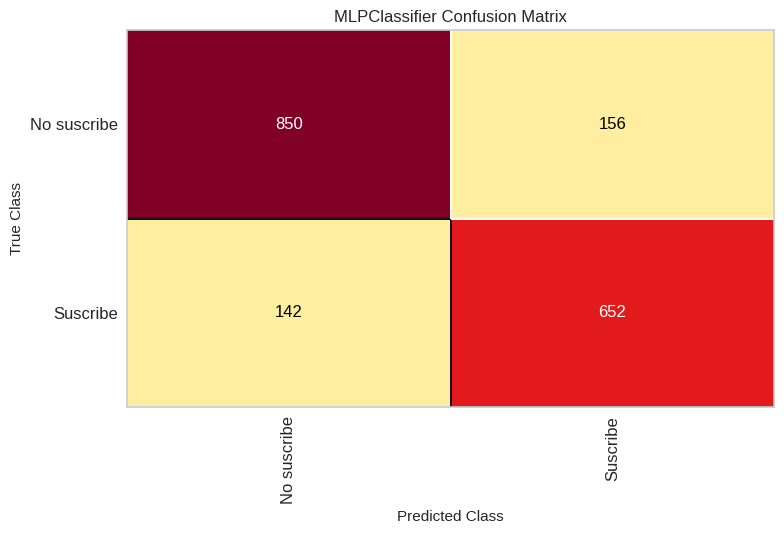

<Axes: title={'center': 'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [99]:
from yellowbrick.classifier import ConfusionMatrix

visualizer = ConfusionMatrix(model_final, classes=['No suscribe', 'Suscribe'])

visualizer.score(X_test, np.ravel(Y_test))

visualizer.show()

**Interpretación**

* 850: Predicciones correctas de "No Suscribe".
* 652: Predicciones correctas de "Suscribe".
* 156: Falsos positivos (predicciones incorrectas de "Suscribe" para casos que eran "No Suscribe").
* 142: Falsos negativos (predicciones incorrectas de "No Suscribe" para casos que eran "Suscribe").

## Desempeño final del modelo

El desempeño final del modelo tuvo un score de 83.44 %

## Conclusiones

El modelo de clasificación desarrollado en este proyecto logró un score del **84%** en la predicción de si un cliente adquirirá o no el plan de inversión bancaria ofrecido a través de una campaña de telemarketing. Este resultado es indicativo de un desempeño robusto y satisfactorio para el propósito de la predicción, mostrando una buena capacidad para diferenciar entre clientes potenciales que probablemente suscribirán al plan y aquellos que no lo harán.

## Análisis de la Matriz de Confusión

La matriz de confusión obtenida para el modelo proporcionó insights clave sobre el desempeño específico del modelo en términos de sus predicciones correctas e incorrectas:

* Predicciones Correctas de "No Suscribe": 850 casos
* Predicciones Correctas de "Suscribe": 652 casos
* Falsos Positivos ("Suscribe" erróneo): 156 casos
* Falsos Negativos ("No Suscribe" erróneo): 142 casos


Estos resultados destacan algunos aspectos importantes:

1. Alta Precisión en Predicciones Negativas: El modelo tiene una alta capacidad para identificar correctamente a los clientes que no suscribirán al plan de inversión, con 850 predicciones correctas en esta categoría. Esto es esencial para evitar gastos innecesarios en esfuerzos de marketing hacia clientes menos interesados.

2. Buen Desempeño en Predicciones Positivas: Con 652 predicciones correctas de clientes que suscriben, el modelo también demuestra una capacidad significativa para identificar correctamente a los clientes potencialmente interesados en el plan de inversión.

3. Proporción de Falsos Positivos y Negativos: La presencia de 156 falsos positivos y 142 falsos negativos sugiere que el modelo podría mejorar en la distinción entre clases. Los falsos positivos pueden llevar a costos adicionales en la campaña de marketing, mientras que los falsos negativos representan oportunidades perdidas para captar clientes interesados.

## ¿Qué se puede decir acerca del uso de técnicas de inteligencia artificial en problemas de mercadotecnia?

La alta precisión en la identificación de clientes no interesados permite a la organización optimizar sus recursos de marketing, enfocando los esfuerzos en aquellos clientes que tienen una mayor probabilidad de suscribir al plan de inversión, lo cual puede reducir costos y mejorar la eficiencia de la campaña.

La capacidad del modelo para predecir correctamente a los clientes interesados permite ajustar la estrategia de telemarketing para personalizar las ofertas y mensajes, mejorando la tasa de conversión y satisfacción del cliente.

Con refinamientos adicionales, el modelo puede seguir mejorando y proporcionando un mayor valor a la estrategia de marketing del banco.